In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, Normalizer, Binarizer,OrdinalEncoder,RobustScaler
import warnings
warnings.filterwarnings('ignore')
df=sns.load_dataset('iris')
df


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# **SVM FOR CLASSIFICATION**

In [71]:
X=df.drop('species',axis=1)
y=df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = SVC(kernel='rbf', C=1.0, random_state=42)

svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print('Precision:', precision_score(y_test, y_pred, average='macro'))
print('Recall:', recall_score(y_test, y_pred, average='macro'))
print('F1:', f1_score(y_test, y_pred, average='macro'))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))



Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



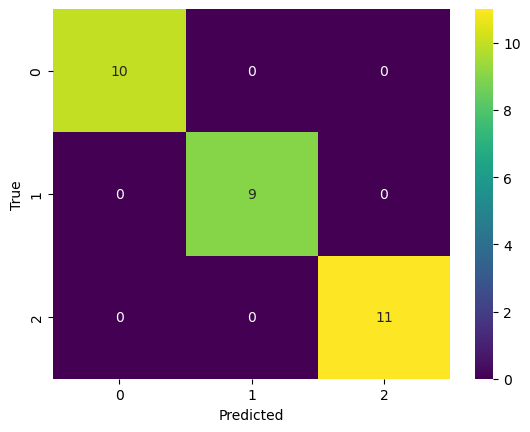

In [72]:
#making Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='viridis', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# **SVM FOR REGRESSION**

In [73]:
df=sns.load_dataset("diamonds")
X=df.drop('price',axis=1)
y=df['price']




In [74]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [75]:
le=LabelEncoder()
for col in X.columns:
    if X[col].dtype=='object' or X[col].dtype=='category':
        X[col]=le.fit_transform(X[col])

# ADD X COLUMNS INTO DF
df=pd.concat([X,y],axis=1)


In [76]:
df.dtypes

carat      float64
cut          int32
color        int32
clarity      int32
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [77]:
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43,326
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31,326
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31,327
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63,334
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,5.75,5.76,3.50,2757
53936,0.72,1,0,2,63.1,55.0,5.69,5.75,3.61,2757
53937,0.70,4,0,2,62.8,60.0,5.66,5.68,3.56,2757
53938,0.86,3,4,3,61.0,58.0,6.15,6.12,3.74,2757


# *****SVM(FOR REGRESSION) FOR LARGE DATASET IS NOT WORKING SO WE USE GRADIENTBOOSTING*****

In [78]:

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# svm = SVR(kernel='linear')

# svm.fit(X_train, y_train)

# y_pred = svm.predict(X_test)

# print('MSE',mean_squared_error(y_test, y_pred))
# print('RMSE',np.sqrt(mean_squared_error(y_test, y_pred)))
# print('MAE',mean_absolute_error(y_test, y_pred))
# print('R2',r2_score(y_test, y_pred))
# print('MAPE',mean_absolute_percentage_error(y_test, y_pred))



In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.ensemble import GradientBoostingRegressor
svm = GradientBoostingRegressor()

svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

print('MSE',mean_squared_error(y_test, y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE',mean_absolute_error(y_test, y_pred))
print('R2',r2_score(y_test, y_pred))
print('MAPE',mean_absolute_percentage_error(y_test, y_pred))

MSE 429930.0626262262
RMSE 655.6905235141242
MAE 364.8587469927326
R2 0.972954966881624
MAPE 0.11648505188727362
